<div style="text-align:center"><img src="League-Legends-contara-sistema-desafios_1571552855_971917_1440x810.jpeg" /></div>


# *CAMBIOS DURANTE UNA SEASON EN LEAGUE OF LEGENDS*


### En este proyecto vamos a mostrar como el juego League of Legends, comunmente conocido como 'LOL', lleva a cabo muchos cambios durante una temporada en el juego, lo cual repercute a la jugabilidad de este mismo.

#### Nos centramos en la temporada 12, donde su primer parche se introdujo el 5 de Enero de 2022 y el último siendo el 6 de Diciembre de 2022.  Dicha temporada ha abarcado nada más y nada menos que 23 parches desde una fecha a la otra, pero vamos a enfocarnos en coger solo 3 parches, el 12.1, el 12.13 y el 12.23, con el fin de poder ver como se inicia la temporada, como se encuentra a mitad de temporada, y con el último poder ver realmente si ha sufrido muchos cambios desde el principio, pudiendo demostrar que dicho juego varía mucho.
 


### Importamos las librerías necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go




## Cargamos los 3 parches que vamos a utilizar.

In [2]:
p1=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/S12/League of Legends Champion Stats 12.1.csv",sep=";")

p13=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/S12/League of Legends Champion Stats 12.13.csv",sep=";")

p23=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/S12/League of Legends Champion Stats 12.23.csv",sep=";")



### Mostramos a continuación las cabeceras de los parches para ver que funcionan correctamente y que casi todas sus stats son distintas.

In [3]:
p1.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23


In [4]:
p13.head()


,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,69.09,0.40,49.54%,92.37%,7.47%,5.81%,1.95
1,Ahri,Mage,MID,God,71.47,-1.62,51.08%,94.53%,8.58%,5.88%,2.66
2,Akali,Assassin,MID,S,66.02,5.61,48.20%,69.28%,8.45%,12.11%,2.37
3,Akali,Assassin,TOP,B,46.97,5.99,47.26%,29.94%,3.44%,12.11%,2.05
4,Akshan,Marksman,MID,B,43.54,-5.53,48.29%,58.06%,2.72%,6.43%,2.17


In [5]:
p23.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,89.50,0.31,50.10%,90.37%,9.85%,20.80%,1.90
1,Ahri,Mage,MID,A,52.62,-2.26,49.64%,91.71%,5.37%,2.28%,2.40
2,Akali,Assassin,MID,S,61.16,-4.15,48.46%,75.48%,9.39%,15.86%,2.30
3,Akali,Assassin,TOP,B,41.14,-1.83,45.46%,23.39%,2.95%,15.86%,1.98
4,Akshan,Marksman,MID,A,49.05,-0.97,51.55%,64.06%,2.49%,3.87%,2.18


### Mostramos las dimensiones de cada uno para ver la variación producida.


In [6]:
print(p1.shape, "\n")
print(p13.shape, "\n")
print(p23.shape, "\n")

(232, 11) 

(240, 11) 

(252, 11) 



Como podemos observar, se han añadido filas a los parches, ya que se tratan de personajes nuevos, así como roles que se han ido incluyendo a personajes.

## Vamos a convertir aquellas columnas que tienen porcentajes en numérico.

In [7]:
# Quitamos el símbolo de % 

for col in ["Win %", "Role %", "Pick %", "Ban %"]:
    p1[col] = p1[col].str[:-1]
    p13[col] = p13[col].str[:-1]
    p23[col] = p23[col].str[:-1]

p13

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,69.09,0.40,49.54,92.37,7.47,5.81,1.95
1,Ahri,Mage,MID,God,71.47,-1.62,51.08,94.53,8.58,5.88,2.66
2,Akali,Assassin,MID,S,66.02,5.61,48.20,69.28,8.45,12.11,2.37
3,Akali,Assassin,TOP,B,46.97,5.99,47.26,29.94,3.44,12.11,2.05
4,Akshan,Marksman,MID,B,43.54,-5.53,48.29,58.06,2.72,6.43,2.17
...,...,...,...,...,...,...,...,...,...,...,...
235,Ziggs,Mage,ADC,D,35.17,2.13,49.97,49.83,1.09,0.28,2.44
236,Zilean,Support,MID,A,53.68,0.57,53.22,18.17,0.81,2.17,3.47
237,Zilean,Support,SUPPORT,A,48.10,3.96,49.78,78.18,3.40,2.17,3.14
238,Zoe,Mage,MID,B,46.72,-0.80,47.93,91.35,3.61,1.69,2.44


In [8]:
p13.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %      object
Role %     object
Pick %     object
Ban %      object
KDA       float64
dtype: object

In [9]:
# Convertimos a float

cols = ["Win %", "Role %", "Pick %", "Ban %"]
p1[cols] = p1[cols].apply(pd.to_numeric)
p13[cols] = p13[cols].apply(pd.to_numeric)
p23[cols] = p23[cols].apply(pd.to_numeric)

In [10]:
p13.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

# A continuación mostraremos los valores que se encuentran en las columnas Class, Role y Tier.

#### La columna Class va a ser siempre la misma, tal y como Role, aunque esta tiene la particularidad como veremos más adelante de que algún personaje puedo tener algún Role nuevo a lo largo de la temporada.

#### En el caso de la columna Tier van a ser siempre las mismas etiquetas, solo que variarán de un parche a otro, ya que son aquellas que se establecen a los personajes en función de lo fuerte que sean en dichos parches. En este apartado no tocamos dicha columna, pero poco después sí.



## Tras esto con gráficos, veremos cuales son las clases y roles que más aparecen en el parche 1 y veremos si varía en cuanto a roles con el parche 23. 

In [11]:
Class=p1.Class.unique().tolist()
Class.pop()    # Al tomar una clase como nula, hemos eliminado dicho valor.
print(f"Las clases de personajes que encontramos son: {Class}", "\n")

Role=p1.Role.unique().tolist()
print(f"Los roles de personajes que encontramos son: {Role}", "\n")

Tier=p1.Tier.unique().tolist()
print(f"Las etiquetas que se ponen a los personajes dependiendo de su potencial en ese parche son: {Tier}")




Las clases de personajes que encontramos son: ['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', 'Support'] 

Los roles de personajes que encontramos son: ['TOP', 'MID', 'SUPPORT', 'JUNGLE', 'ADC'] 

Las etiquetas que se ponen a los personajes dependiendo de su potencial en ese parche son: ['A', 'S', 'B', 'C', 'D', 'God']


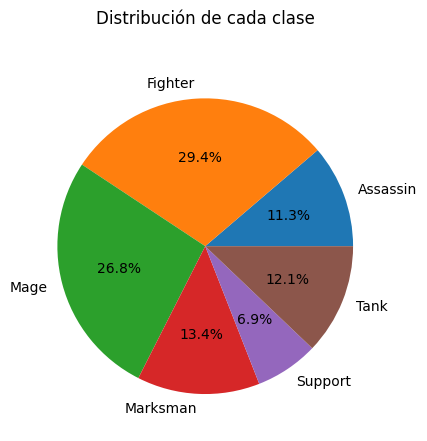

In [12]:
# Las clases de los personajes no varían, pero a la hora de mostrar un gráfico sí, ya que se añaden nuevos campeones y pueden provocar cambios en los %.

tamaño_Class = p1.groupby("Class").size()
labels = tamaño_Class.index.tolist()

fig, ax = plt.subplots()
ax.pie(tamaño_Class, labels=labels, autopct='%1.1f%%')
ax.set_title("Distribución de cada clase", y=1.08)

plt.show()

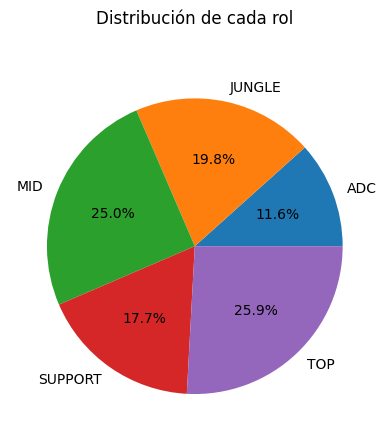

In [13]:
# Ahora mostraremos los roles

tamaño_Role = p1.groupby("Role").size()
labels = tamaño_Role.index.tolist()

fig, ax = plt.subplots()
ax.pie(tamaño_Role, labels=labels, autopct='%1.1f%%')
ax.set_title("Distribución de cada rol", y=1.08)

plt.show()


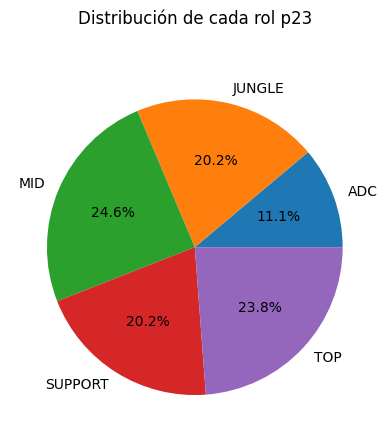

In [14]:
# Para el parche 23

tamaño_Role23 = p23.groupby("Role").size()
labels23 = tamaño_Role23.index.tolist()

fig, ax = plt.subplots()
ax.pie(tamaño_Role23, labels=labels23, autopct='%1.1f%%')
ax.set_title("Distribución de cada rol p23", y=1.08)

plt.show()

### Claramente podemos mostrar ya un primer cambio que se produce desde el p1 al p23, donde los roles son aquellas posiciones que deben jugar los personajes, pero como podemos observar, durante una temporada pueden implementarse campeones a otras posiciones, y he aquí la demostración de que la variación es verídica.

# En función de lo anterior, vamos a seguir mostrando más cambios producidos durante una season en League of Legends.

In [15]:
# Vemos aquellos personajes que cumplen con ambas condiciones de class y role del parche 1.


fighter_top= p1[(p1["Class"] == "Fighter") & (p1["Role"] == "TOP")]
fighter_top


,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97,94.62,4.43,2.03,1.97
22,Camille,Fighter,TOP,God,84.61,9.60,50.20,96.80,7.17,7.54,1.99
28,Darius,Fighter,TOP,God,83.96,16.49,50.37,95.85,6.58,15.17,1.87
39,Fiora,Fighter,TOP,S,75.08,4.32,50.05,97.65,6.08,10.76,1.76
43,Gangplank,Fighter,TOP,S,65.59,14.31,47.66,87.34,5.92,4.44,1.99
45,Garen,Fighter,TOP,S,73.99,15.67,51.55,87.46,5.74,2.13,2.10
46,Gnar,Fighter,TOP,A,47.10,4.58,49.86,97.87,3.05,0.60,2.01
47,Gragas,Fighter,TOP,C,37.47,-2.35,48.75,39.67,1.96,0.32,2.24
52,Gwen,Fighter,TOP,A,54.66,13.03,49.82,82.83,4.23,2.43,1.73
59,Illaoi,Fighter,TOP,C,34.11,-3.45,49.16,92.36,2.07,2.53,1.49


## Una vez conseguido esta tabla, vamos a mostrar el por qué hay personajes con menos de un 60 % de ROLE %

In [16]:
# Filtramos con una mascara de booleanos para sacar los valores menores a 60

fighter_top_menos60=fighter_top.loc[fighter_top["Role %"] <= 60]
fighter_top_menos60

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
47,Gragas,Fighter,TOP,C,37.47,-2.35,48.75,39.67,1.96,0.32,2.24
60,Irelia,Fighter,TOP,God,81.35,-5.02,49.10,60.00,6.24,23.51,1.58
118,Olaf,Fighter,TOP,D,11.03,-6.16,45.46,15.64,0.27,0.92,1.63
123,Pantheon,Fighter,TOP,D,30.79,-10.85,49.68,26.73,0.93,0.89,2.10
141,Rumble,Fighter,TOP,D,25.32,-2.02,47.57,46.60,1.01,0.26,2.02
157,Shyvana,Fighter,TOP,D,23.83,-11.61,49.83,12.59,0.21,0.26,1.88
162,Skarner,Fighter,TOP,D,23.89,-6.83,48.90,22.21,0.18,0.16,2.22
183,Trundle,Fighter,TOP,B,44.04,3.38,52.78,31.17,1.84,2.60,1.83
207,Volibear,Fighter,TOP,D,32.21,-8.58,46.11,56.03,2.58,1.48,1.79
209,Warwick,Fighter,TOP,D,31.35,-7.37,49.36,24.85,1.20,5.60,1.94


In [17]:
# Aplicamos a la columna name, aquellos valores de la máscara de booleanos de la misma columna

masc_ftm60=p1.loc[p1["Name"].isin(["Gragas","Irelia","Olaf","Pantheon",
                                   "Rumble","Shyvana","Skarner",
                                   "Trundle","Volibear"
                                   "Warwick","Yasuo"])]
masc_ftm60

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
47,Gragas,Fighter,TOP,C,37.47,-2.35,48.75,39.67,1.96,0.32,2.24
48,Gragas,Fighter,JUNGLE,C,36.10,-7.55,48.00,40.60,1.64,0.32,2.70
49,Gragas,Fighter,SUPPORT,D,32.15,-2.55,47.64,11.54,0.49,0.32,2.25
60,Irelia,Fighter,TOP,God,81.35,-5.02,49.10,60.00,6.24,23.51,1.58
61,Irelia,Fighter,MID,A,48.07,-1.08,48.24,39.17,4.10,23.51,1.75
117,Olaf,Fighter,JUNGLE,C,36.61,5.55,49.07,84.79,1.48,0.85,2.45
118,Olaf,Fighter,TOP,D,11.03,-6.16,45.46,15.64,0.27,0.92,1.63
121,Pantheon,Fighter,MID,B,41.54,-2.49,50.80,27.31,1.16,0.89,2.25
122,Pantheon,Fighter,SUPPORT,D,32.78,-2.48,47.00,39.76,1.78,0.89,1.89
123,Pantheon,Fighter,TOP,D,30.79,-10.85,49.68,26.73,0.93,0.89,2.10


In [18]:
# Nos quedamos con aquellas columnas que realmente nos interesan

masc_ftm60_rz=masc_ftm60.iloc[:,[0,2,3,7]]
masc_ftm60_rz

,Name,Role,Tier,Role %
47,Gragas,TOP,C,39.67
48,Gragas,JUNGLE,C,40.60
49,Gragas,SUPPORT,D,11.54
60,Irelia,TOP,God,60.00
61,Irelia,MID,A,39.17
117,Olaf,JUNGLE,C,84.79
118,Olaf,TOP,D,15.64
121,Pantheon,MID,B,27.31
122,Pantheon,SUPPORT,D,39.76
123,Pantheon,TOP,D,26.73


In [19]:
# Sacamos manualmente aquellos valores que nos interesan para la muestra.

muestra1=masc_ftm60_rz.loc[masc_ftm60_rz["Name"].isin(["Irelia","Olaf",
                                               "Shyvana","Skaner","Trundle"])]
muestra1

,Name,Role,Tier,Role %
60,Irelia,TOP,God,60.00
61,Irelia,MID,A,39.17
117,Olaf,JUNGLE,C,84.79
118,Olaf,TOP,D,15.64
156,Shyvana,JUNGLE,C,82.59
157,Shyvana,TOP,D,12.59
182,Trundle,JUNGLE,A,62.99
183,Trundle,TOP,B,31.17


### Podemos observar en la tabla que según los filtros aplicados, aquellos que tenían menos de un 60 % en la columna "Role %", es porque tienen más roles.
### Esto quiere decir que son personajes que se utilizan en varias posiciones y por ello no son específicos para una sola, pero sí que se pueden apreciar 2 cosas a simple vista, y es que aquellos que solo tienen 2 posiciones, tienen un rol más predominante y el de menor % es el que en algún momento desde los comienzos del juego, se empezó a jugar en otra posición pero no es la mejor opción a jugar en este parche.


## Por ello vamos a comparar estos personajes cuyos datos pertenecen al parche 1, con los del parche 13 y 23, para ver si varían realmente.

In [20]:
# Parche 1

muestra1

,Name,Role,Tier,Role %
60,Irelia,TOP,God,60.00
61,Irelia,MID,A,39.17
117,Olaf,JUNGLE,C,84.79
118,Olaf,TOP,D,15.64
156,Shyvana,JUNGLE,C,82.59
157,Shyvana,TOP,D,12.59
182,Trundle,JUNGLE,A,62.99
183,Trundle,TOP,B,31.17


In [21]:
# Parche 13

muestra2=p13.loc[p13["Name"].isin(["Irelia","Olaf",
                                    "Shyvana","Skaner","Trundle"])]
muestra2=muestra2.iloc[:,[0,2,3,7]]
muestra2


,Name,Role,Tier,Role %
61,Irelia,TOP,S,54.23
62,Irelia,MID,A,44.10
122,Olaf,TOP,A,72.01
123,Olaf,JUNGLE,D,24.12
161,Shyvana,JUNGLE,A,58.17
162,Shyvana,TOP,A,39.80
190,Trundle,JUNGLE,A,71.68
191,Trundle,TOP,B,24.24


In [22]:
# Parche 23

muestra3=p23.loc[p23["Name"].isin(["Irelia","Olaf",
                                    "Shyvana","Skaner","Trundle"])]
muestra3=muestra3.iloc[:,[0,2,3,7]]
muestra3

,Name,Role,Tier,Role %
65,Irelia,TOP,S,45.65
66,Irelia,MID,A,52.11
129,Olaf,TOP,A,72.96
130,Olaf,JUNGLE,D,22.73
171,Shyvana,JUNGLE,C,81.05
172,Shyvana,TOP,D,11.84
198,Trundle,JUNGLE,C,70.84
199,Trundle,TOP,D,21.97


### Una vez tenemos las 3 muestras vamos a selecionar de cada parche, aquellas filas cuyo Role % sea > 50 y realizaremos un gráfico para ver su variación

In [23]:
# Aplicamos máscara para seleccionar solo aquellos que deseamos mostrar

var1=muestra1.loc[muestra1["Role %"] > 50]
var2=muestra2.loc[muestra2["Role %"] > 50]
var3=muestra3.loc[muestra3["Role %"] > 50]
var1

,Name,Role,Tier,Role %
60,Irelia,TOP,God,60.00
117,Olaf,JUNGLE,C,84.79
156,Shyvana,JUNGLE,C,82.59
182,Trundle,JUNGLE,A,62.99


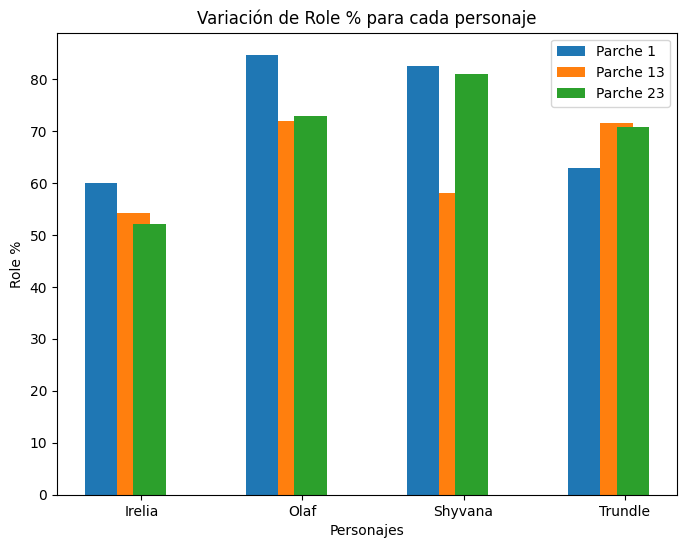

In [24]:
# En este mostramos la variación del Role %

names = ["Irelia", "Olaf", "Shyvana", "Trundle"]

role_percentages_var1 = [60.0, 84.7, 82.5, 62.9]
role_percentages_var2 = [54.2, 72.0, 58.1, 71.6]
role_percentages_var3 = [52.1, 72.9, 81.0, 70.8]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

# Definir la anchura de las barras y la separación entre ellas
bar_width = 0.2
bar_gap = 0.05

# Agregar barras para cada variable, con los valores de "Role %" y el ancho de cada barra
ax.bar([i - bar_gap - bar_width for i in range(len(names))], role_percentages_var1, width=bar_width, label="Parche 1")
ax.bar([i - bar_gap for i in range(len(names))], role_percentages_var2, width=bar_width, label="Parche 13")
ax.bar([i + bar_gap for i in range(len(names))], role_percentages_var3, width=bar_width, label="Parche 23")

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)

# Agregar etiquetas para los ejes X e Y, y un título
ax.set_xlabel("Personajes")
ax.set_ylabel("Role %")
ax.set_title("Variación de Role % para cada personaje")

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

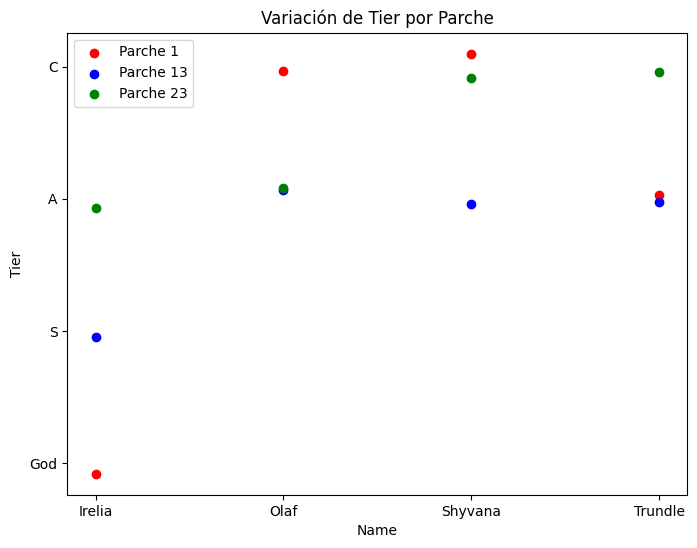

In [25]:
# Procedemos a meter los datos manualmente para hacer el gráfico de la Tier y ver como varían

names = ["Irelia", "Olaf", "Shyvana", "Trundle"]
tiers1 = pd.Categorical(["God", "C", "C", "A"], categories=["God", "S", "A", "C"])
tiers2 = pd.Categorical(["S", "A", "A", "A"], categories=["God", "S", "A", "C"])
tiers3 = pd.Categorical(["A", "A", "C", "C"], categories=["God", "S", "A", "C"])

# Crear una figura y un eje
fig, ax = plt.subplots()

# Establecer el tamaño de la figura
fig.set_size_inches(8, 6)

# Configurar la trama de dispersión para cada variable
ax.scatter(np.arange(len(names)), tiers1.codes + np.random.uniform(-0.1, 0.1, len(names)), c='red', label='Parche 1')
ax.scatter(np.arange(len(names)), tiers2.codes + np.random.uniform(-0.1, 0.1, len(names)), c='blue', label='Parche 13')
ax.scatter(np.arange(len(names)), tiers3.codes + np.random.uniform(-0.1, 0.1, len(names)), c='green', label='Parche 23')

# Añadir etiquetas a los ejes y un título
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_xlabel('Name')
ax.set_ylabel('Tier')
ax.set_title('Variación de Tier por Parche')

# Establecer las etiquetas del eje Y
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["God", "S", "A", "C"])

# Añadir una leyenda
ax.legend()

# Mostrar la trama
plt.show()


# A continuación vamos a mostrar el Top 5 de personajes de la posición MID, para ver si han variado desde el parche 1 al parche 23.

In [26]:
# Filtramos con máscara para saber aquellos personajes cuyo rol es MID en ambos parches

p1_mid=p1.loc[p1["Role"]== "MID"]
p13_mid=p13.loc[p13["Role"]== "MID"]
p23_mid=p23.loc[p23["Role"] == "MID"]
p23_mid

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
1,Ahri,Mage,MID,A,52.62,-2.26,49.64,91.71,5.37,2.28,2.40
2,Akali,Assassin,MID,S,61.16,-4.15,48.46,75.48,9.39,15.86,2.30
4,Akshan,Marksman,MID,A,49.05,-0.97,51.55,64.06,2.49,3.87,2.18
9,Anivia,Mage,MID,A,50.12,-0.46,51.53,76.09,1.92,1.78,2.69
11,Annie,Mage,MID,B,44.34,1.40,49.95,75.60,1.30,0.49,2.22
...,...,...,...,...,...,...,...,...,...,...,...
235,Yone,Assassin,MID,S,61.43,-3.39,50.60,62.97,9.30,11.43,1.89
241,Zed,Assassin,MID,God,87.21,-4.61,49.89,73.36,12.43,47.72,2.22
244,Ziggs,Mage,MID,B,48.01,1.73,51.68,52.33,1.41,0.34,2.40
247,Zilean,Support,MID,A,54.98,4.06,54.42,12.95,0.53,1.78,3.39


In [27]:
# Ordenamos la columna Score para ver de arriba a abajo los valores.

p1_mid=p1_mid.sort_values("Score", ascending=False)
p13_mid=p13_mid.sort_values("Score", ascending=False)
p23_mid=p23_mid.sort_values("Score", ascending=False)
p23_mid

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
241,Zed,Assassin,MID,God,87.21,-4.61,49.89,73.36,12.43,47.72,2.22
232,Yasuo,Fighter,MID,S,68.71,-3.04,49.39,69.55,12.59,19.16,1.70
84,Kassadin,Assassin,MID,S,62.01,7.71,52.61,96.64,6.69,11.02,2.56
235,Yone,Assassin,MID,S,61.43,-3.39,50.60,62.97,9.30,11.43,1.89
184,Sylas,Mage,MID,S,61.27,-6.41,50.12,44.63,8.48,17.41,2.11
...,...,...,...,...,...,...,...,...,...,...,...
22,Brand,Mage,MID,B,41.94,-3.46,49.74,13.23,0.78,5.49,1.96
140,Qiyana,Assassin,MID,B,41.54,-1.16,46.67,79.70,2.96,1.12,2.01
158,Ryze,Mage,MID,B,40.93,-5.80,46.23,82.74,2.83,0.27,2.09
202,Twisted Fate,Mage,MID,C,40.26,0.56,46.94,86.01,1.90,0.11,2.09


In [28]:
# Cogemos la cabecera, lo cual incluye los 5 con más valor en la columna score

p1_mid=p1_mid.head()
p13_mid=p13_mid.head()
p23_mid=p23_mid.head()
p1_mid

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
224,Zed,Assassin,MID,God,90.50,-0.27,50.87,67.21,8.84,41.88,2.31
216,Yasuo,Fighter,MID,God,86.16,-0.04,49.56,71.44,11.77,24.41,1.74
202,Viktor,Mage,MID,God,81.46,-0.14,51.10,84.98,10.55,16.00,2.35
198,Vex,Mage,MID,God,76.85,10.71,50.76,84.52,9.15,19.25,2.48
219,Yone,Assassin,MID,S,74.16,-7.47,48.42,60.52,9.35,27.32,1.84


### Vamos a mostrar un gráfico con dichas variaciones

In [29]:
# Seleccionamos las columnas que queremos

p1_mid=p1_mid.iloc[:,[0,4]]
p13_mid=p13_mid.iloc[:,[0,4]]
p23_mid=p23_mid.iloc[:,[0,4]]

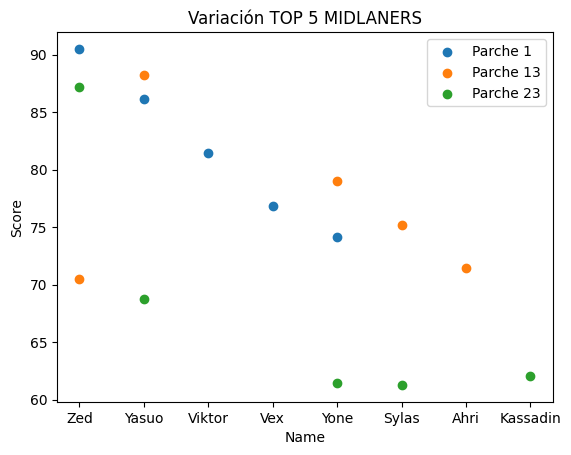

In [30]:
fig, ax = plt.subplots()

ax.scatter(p1_mid['Name'], p1_mid['Score'], label='Parche 1')
ax.scatter(p13_mid['Name'], p13_mid['Score'], label='Parche 13')
ax.scatter(p23_mid['Name'], p23_mid['Score'], label='Parche 23')

ax.set_xlabel("Name")
ax.set_ylabel("Score")
ax.set_title("Variación TOP 5 MIDLANERS")

ax.legend()

plt.show()






#### Como podemos observar se produce una gran variación, ya que hemos incluido todos los personajes que aparecían en los 3 Top5 y vemos como hay personajes que no aparecen en todos y que además varios de ellos muestran gran cambio en sus puntuaciones.

# Procedemos a mostrar como comentamos al principio, el por qué las filas cambian de un parche a otro.

In [31]:
# Sacamos las filas que se encuentran en la columna Name del p1

# pd.set_option('display.max_rows', 20)

names1=p1.copy()

names1=names1[["Name"]]

names1

,Name
0,Aatrox
1,Ahri
2,Akali
3,Akali
4,Akshan
...,...
227,Ziggs
228,Zilean
229,Zilean
230,Zoe


In [32]:
# Para p13

# pd.set_option('display.max_rows', 20)

names13=p13.copy()

names13=names13[["Name"]]

names13

,Name
0,Aatrox
1,Ahri
2,Akali
3,Akali
4,Akshan
...,...
235,Ziggs
236,Zilean
237,Zilean
238,Zoe


In [33]:
# Para p23

# pd.set_option('display.max_rows', 20)

names23=p23.copy()

names23=names23[["Name"]]

names23

,Name
0,Aatrox
1,Ahri
2,Akali
3,Akali
4,Akshan
...,...
247,Zilean
248,Zilean
249,Zoe
250,Zoe


### Hemos sacado a mano todas las veces que salen cada personaje en cada parche, contando los nuevos roles incorporados a algunos personajes y además de ello, los personajes que se han incorporado nuevo.
Las razones de que se añadan nuevos roles a personajes suele ser por ítems que se hacen más fuertes en cada parche, por algún buff que le hayan metido a un campeón (hacer más fuerte) y por ello se pueda adaptar bien a ese rol, o bien por el simple hecho de que profesionales del juego, lo hayan jugado en partidos oficiales y hayan mostrado que el potencial es grande.
Al igual que se añaden, también se suprimen aquellos roles que en dichos parches sean totalmente inviables.

#### Con esto vamos a mostrar sus % de Win Rate, Ban y Pick, para ver como le afectan los nuevos roles incorporados, así como de fuerte están los nuevos champs.


## Las diferencias que hemos encontrado del parche 13 al 1 son 8 filas de variación (de 232 a 240) y serían las siguientes:
- Se le ha añadido roles a Mordekaiser,Nasus, Neeko, Singed, Tahm Kench (2), Taric y Varus.
- Se le ha quitado roles a Graves, Gwen,Kled, Senna, Taliyah, Veigar, Vex y Viktor.
- Se han añadido Bel'Veth, Nilah, Renata Glasc y Zeri (2).

In [34]:
# Aún sabiendo que filas se han añadido y cuales quitado, nos vamos a centrar en aquellos personajes nuevos para ver su repercusión .

mask1=p13[p13["Name"].isin(["Bel'Veth","Nilah","Renata Glasc", "Zeri"])]
mask1=mask1.iloc[:,[0,6,8,9]]
mask1

,Name,Win %,Pick %,Ban %
19,Bel'Veth,51.38,7.65,45.27
119,Nilah,50.72,14.42,47.92
139,Renata Glasc,52.87,9.53,9.01
232,Zeri,49.45,8.41,9.10
233,Zeri,48.43,1.67,9.10


In [35]:
# Creamos un gráfico de barras para ver aquellas estadísticas principales de los nuevos personajes
 
trace1 = go.Bar(x = mask1["Name"],
               y = mask1['Win %'],
               name = 'Win %',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = mask1["Win %"])

trace2 = go.Bar(x = mask1["Name"],
               y = mask1["Pick %"],
               name = 'Pick %',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = mask1['Pick %'])

trace3 = go.Bar(x = mask1["Name"],
               y = mask1["Ban %"],
               name = 'Ban %',
               marker = dict(color = 'rgba(140, 230, 50, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = mask1['Ban %'])




data = [trace1, trace2, trace3]

layout = {
    'xaxis': {'title': 'Name'},
    'yaxis': {'title': 'Porcentaje'},
    'barmode': 'group',
    'title': 'Estadísticas de cada campeón'
}

fig = go.Figure(data = data, layout = layout)

fig

## Las diferencias que hemos encontrado del parche 23 al 13 son 12 filas de variación (de 240 a 252) y serían las siguientes:
- Se le ha añadido roles a Cassiopeia,Fiddlestick, Gragas, Gwen, Kled, Maokai,Poppy, Quinn (2), Shen, Taliyah, Twitch, Vel'Koz,Zed, Ziggs y Zoe.
- Se le ha quitado roles a Heimerdinger, Swain, Tahm Kench, Taric y Zeri.
- Se ha añadido a K'Sante.

In [36]:

mask2=p23[p23["Name"].isin(["Bel'Veth","Nilah","Renata Glasc", "Zeri","K'Sante"])]
mask2.iloc[:,[0,6,8,9]]

,Name,Win %,Pick %,Ban %
19,Bel'Veth,51.20,4.15,12.23
77,K'Sante,48.94,8.18,15.65
126,Nilah,54.28,4.33,9.23
149,Renata Glasc,51.53,4.26,2.72
243,Zeri,51.48,9.20,3.90


In [37]:
# Aquí el gráfico para el parche 23

trace4 = go.Bar(x = mask2["Name"],
               y = mask2['Win %'],
               name = 'Win %',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = mask2["Win %"])

trace5 = go.Bar(x = mask2["Name"],
               y = mask2["Pick %"],
               name = 'Pick %',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = mask2['Pick %'])

trace6 = go.Bar(x = mask2["Name"],
               y = mask2["Ban %"],
               name = 'Ban %',
               marker = dict(color = 'rgba(140, 230, 50, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = mask2['Ban %'])




data = [trace4, trace5, trace6]


layout = {
    'xaxis': {'title': 'Name'},
    'yaxis': {'title': 'Porcentaje'},
    'barmode': 'group',
    'title': 'Estadísticas de cada campeón'
}

fig = go.Figure(data = data, layout = layout)

fig

### Con ambas tablas, mostramos como aquellos personajes que se introducen también durante una temporada varían sus estadísticas de la siguiente manera, así como en el caso de Zeri se suprime un rol y su Win Rate aumenta

## Con los mismos campeones del último gráfico, vamos a ver si los cambios producidos en sus KDA afecta al Win %.


In [38]:
# Ponemos las columnas de Win y KDA para ver si están relacionadas

# Parche 13

wk1=p13[p13["Name"].isin(["Bel'Veth","Nilah","Renata Glasc", "Zeri","K'Sante"])]
wk1=wk1.iloc[:,[0,6,10]]
wk1

,Name,Win %,KDA
19,Bel'Veth,51.38,2.38
119,Nilah,50.72,2.17
139,Renata Glasc,52.87,2.93
232,Zeri,49.45,2.44
233,Zeri,48.43,2.33


In [39]:
# Parche 23

wk2=p23[p23["Name"].isin(["Bel'Veth","Nilah","Renata Glasc", "Zeri","K'Sante"])]
wk2=wk2.iloc[:,[0,6,10]]
wk2

,Name,Win %,KDA
19,Bel'Veth,51.20,2.35
77,K'Sante,48.94,2.03
126,Nilah,54.28,2.22
149,Renata Glasc,51.53,2.66
243,Zeri,51.48,2.44


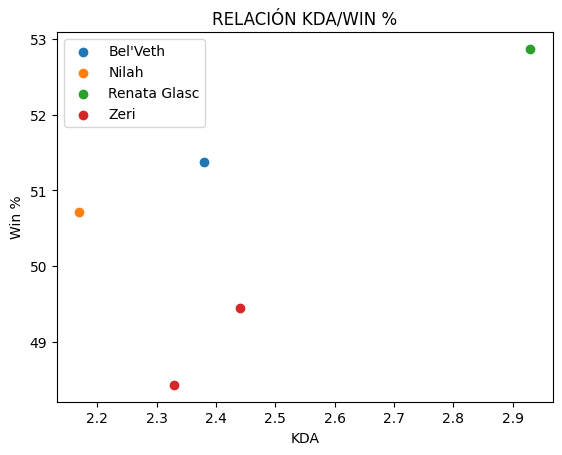

In [53]:
bel1=wk1.loc[wk1["Name"]=="Bel'Veth"]
nil1=wk1.loc[wk1["Name"]=="Nilah"]
ren1=wk1.loc[wk1["Name"]=="Renata Glasc"]
zeri1=wk1.loc[wk1["Name"]=="Zeri"]

fig, ax = plt.subplots()

ax.scatter(bel1['KDA'], bel1['Win %'], label="Bel'Veth")
ax.scatter(nil1['KDA'], nil1['Win %'], label="Nilah")
ax.scatter(ren1['KDA'], ren1['Win %'], label="Renata Glasc")
ax.scatter(zeri1['KDA'], zeri1['Win %'], label="Zeri")

ax.set_xlabel("KDA")
ax.set_ylabel("Win %")
ax.set_title("RELACIÓN KDA/WIN %")

ax.legend()

plt.show()

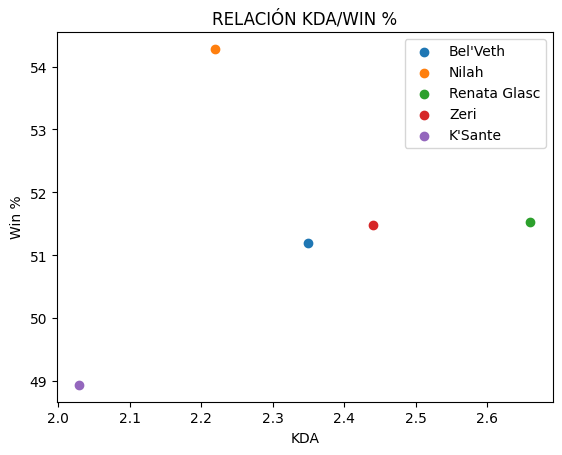

In [41]:
# Parche 23

bel2=wk2.loc[wk2["Name"]=="Bel'Veth"]
nil2=wk2.loc[wk2["Name"]=="Nilah"]
ren2=wk2.loc[wk2["Name"]=="Renata Glasc"]
zeri2=wk2.loc[wk2["Name"]=="Zeri"]
ksant2=wk2.loc[wk2["Name"]== "K'Sante"]

fig, ax = plt.subplots()

ax.scatter(bel2['KDA'], bel2['Win %'], label="Bel'Veth")
ax.scatter(nil2['KDA'], nil2['Win %'], label="Nilah")
ax.scatter(ren2['KDA'], ren2['Win %'], label="Renata Glasc")
ax.scatter(zeri2['KDA'], zeri2['Win %'], label="Zeri")
ax.scatter(ksant2['KDA'], ksant2['Win %'], label="K'Sante")

ax.set_xlabel("KDA")
ax.set_ylabel("Win %")
ax.set_title("RELACIÓN KDA/WIN %")

ax.legend()

plt.show()

### Como podemos ver al disminuir el KDA, se reduce también el ratio de victorias, por lo que su pick % hará que se vea influenciado por esto, ya que mucha menos gente lo jugará.

# EXTRA

## Vamos a mostrar la repercusión que tiene el League Of Legends a nivel mundial.

### Aquí podemos ver un ranking sacado de la plataforma Twitch, la cual emite contenido de todo tipo, principalmente enfocándose en Videojuegos y podemos observar claramente que juego ha sido el más visto en 2022

In [42]:
j22=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/twitch/juegos2022.csv")
j22=j22.drop(columns="Unnamed: 0")
j22

,Game,Hours_watched
0,League of Legends,1.556700e+09
1,Grand Theft Auto V,1.414287e+09
2,VALORANT,1.159769e+09
3,Counter-Strike: Global Offensive,6.997839e+08
4,Apex Legends,6.584776e+08
5,Fortnite,6.208067e+08
6,Minecraft,5.477535e+08
7,Dota 2,5.322532e+08
8,Call of Duty: Warzone,4.383060e+08
9,World of Warcraft,4.075718e+08


[Text(0, 0, 'League of Legends'),
 Text(1, 0, 'Grand Theft Auto V'),
 Text(2, 0, 'VALORANT'),
 Text(3, 0, 'Counter-Strike: Global Offensive'),
 Text(4, 0, 'Apex Legends'),
 Text(5, 0, 'Fortnite'),
 Text(6, 0, 'Minecraft'),
 Text(7, 0, 'Dota 2'),
 Text(8, 0, 'Call of Duty: Warzone'),
 Text(9, 0, 'World of Warcraft')]

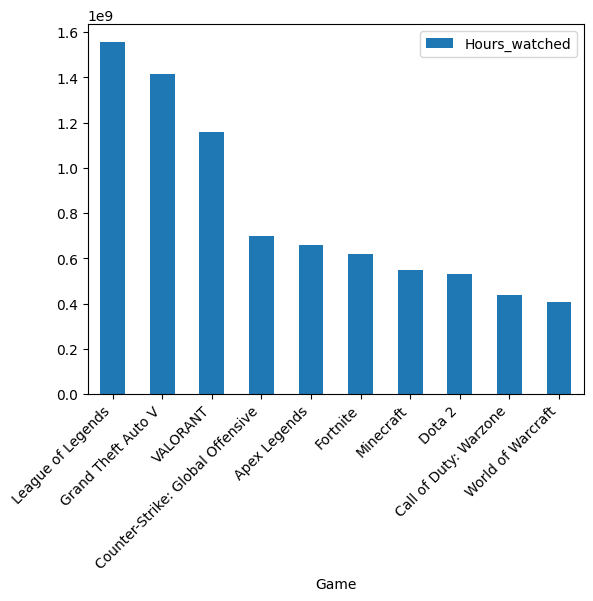

In [58]:
ax=j22.plot.bar(x="Game", y="Hours_watched")
ax.set_xticklabels(j22['Game'], rotation=45, ha='right')

### Procedemos a mostrar el mayor pico de viewers que ha tenido el League of Legends en la plataforma Twitch, en comparación a los siguientes eventos como son la final del mundial de 2022 en Francia, España y la final del mundial de 2010 desde España.

In [63]:
# Comparativa

comp=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/twitch/comparativa.csv")
comp=comp.drop(columns="Unnamed: 0")
comp

,Game,Peak_viewers
0,Final mundial 2022 (ESPAÑA),13005000
1,League of Legends,13220095
2,Final mundial 2010 (ESPAÑA),13933000
3,Final mundial 2022 (FRANCIA),29400000


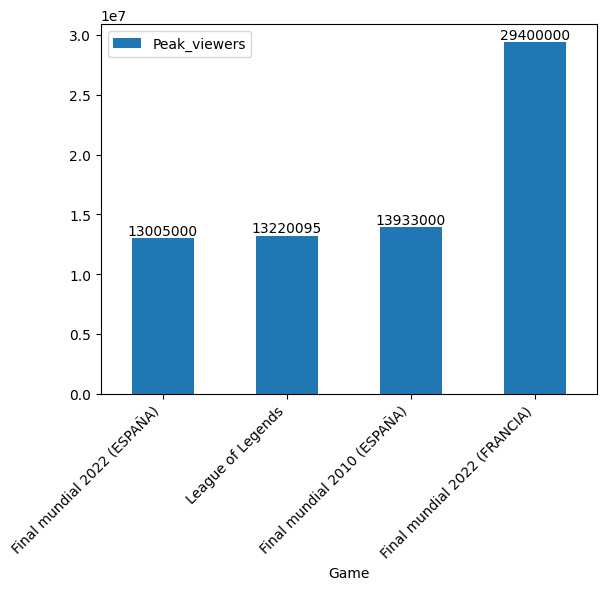

In [66]:
ax=comp.plot.bar(x="Game", y="Peak_viewers")
ax.set_xticklabels(comp['Game'], rotation=45, ha='right')

for i, val in enumerate(comp['Peak_viewers']):
    ax.annotate(str(val), xy=(i, val), ha='center', va='bottom')